# ECE 210 Honors Lab Session 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Matplotlib is building the font cache; this may take a moment.


### Why Vectorize? 
Vectorization and broadcasting take advantage of Single Instruction Multiple Data (SIMD) operations that modern CPU architecture implemented. This allows for data-oriented parallel programming that makes code significantly faster. In an example below, the value of $\pi$ is approximated with a simple Monte Carlo simulation that we talked about in lecture. Try running it with different number of trials (100, 10000, 1000000, 100000000)

In [2]:
numTrials = 100000

randFloat = np.random.rand(numTrials,2)
x = randFloat[:,0]
y = randFloat[:,1]
pi = np.sum(x**2 + y**2 < 1)/numTrials*4
percentError = abs(pi-np.pi)/np.pi*100
print(percentError)


0.04942249874499192


In [3]:
pi = 0
for i in range(numTrials):
    x = np.random.rand(1)
    y = np.random.rand(1)
    if (x**2 + y**2 < 1):
        pi+=1
pi = pi/numTrials*4
percentError = abs(pi-np.pi)/np.pi*100
print(percentError)

0.21159160792571596


When you run the code, you can notice the vectorized implementation (top) is significantly faster. Having a large sample size is crucial for Monte Carlo simulations, as the rate at which the simulation output converges to the correct solution is very slow. <br>
Even for simple image processing tasks on a large image, vectorizing an implementation can make the difference of making a piece of code runnable vs. not runnable. 

### Exercise 1: Generate an 8x8 image of a chessboard
You can do this by creating a 8x8 array of floating points. 
You should use the slice operator, and not a `for` loop 

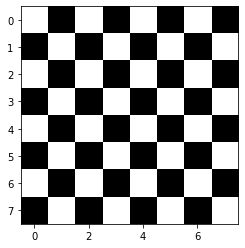

In [4]:
chessboard = np.ones((8,8))
chessboard[1::2,::2]=0
chessboard[::2,1::2]=0

# Use this code to run the program
plt.imshow(chessboard, cmap='gray') # 0 = black, 1 = white

### Exercise 2: Histogramming
Use vectorized numpy function to create a histogram of red, green, and blue pixel values separately. Then plot them on the same plot. X-axis will be the color channel luminance, and Y-axis will be the pixel count for the corresponding pixel value<br>
Hint: np.bincount only works for one dimensional array. <br>
Hint: Use `np.ravel()` 

(768, 1024, 3) The array is height x width x color


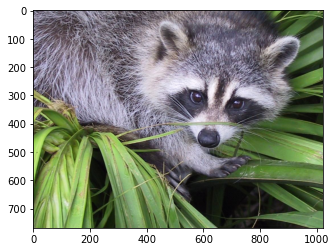

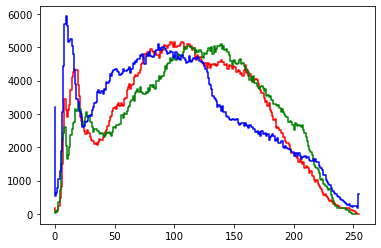

In [7]:
import scipy.misc
# Imports an example RGB image of a raccoon
image = scipy.misc.face()
print(image.shape, 'The array is height x width x color')
plt.imshow(image)
plt.show()

# Put your code here
redHistogram = np.bincount(np.ravel(image[:,:,0]))
greenHistogram = np.bincount(np.ravel(image[:,:,1]))
blueHistogram = np.bincount(np.ravel(image[:,:,2]))


plt.plot(redHistogram,'r', drawstyle='steps')
plt.plot(greenHistogram, 'g', drawstyle='steps')
plt.plot(blueHistogram, 'b', drawstyle='steps')


### Exercise 3: Cosine modulation with broadcasting
Perform cosine modulation to the given signal sig. <br>
Note that the signal needs to be modulated by a higher frequency. Make $\omega_c = 3000$ <br>
Plot the first 100ms of the signal. 

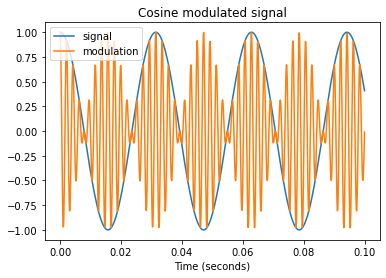

In [8]:
t = np.linspace(0,0.1,1000) # [s]
signal = np.cos(200*t)
# Put your code here
omega_c = 3000
x_t = signal*np.cos(omega_c*t)
plt.plot(t,signal,label='signal')
plt.plot(t,x_t,label='modulation')
plt.xlabel('Time (seconds)')
plt.title('Cosine modulated signal')
plt.legend(loc='best')
plt.show()

### Exercise 4: Full-Wave and Half-Wave Rectification
You are given a signal `sig`. Perform a full-wave rectification and a half-wave rectification on the signal, and plot them in two separate subplots. <br>
Do NOT use `for` loops

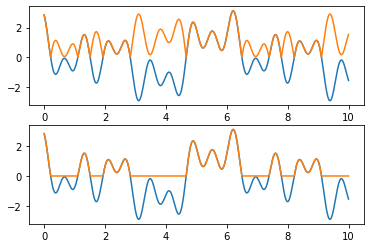

In [19]:
t = np.linspace(0,10, 10000)
sig = np.cos(2*t + np.pi/2) + np.cos(5*t + np.pi/9) + np.cos(t) + np.cos(9*t + np.pi/7);
half = sig.copy()
full = sig.copy()
fig, axes = plt.subplots(2,1)

# Put your code here
half = half*(half>=0)
full = full*((full>=0)*2-1)

axes[0].plot(t, sig)
axes[0].plot(t, full)
axes[1].plot(t, sig)
axes[1].plot(t, half)

### Exercise 5: Linear Algebra
#### 5.1. Multiplying matrices with for loops
Implement a function that accepts two matrices as parameters and returns the product of the two matrices. Write it in nested `for` loops
#### 5.2. Multiplying matrices with a matrix operator
Use the matrix operator to multiply the two matrices and compare the results
#### 5.3. Finding the angle between two vectors
Find the angle between two vectors using matrix operations. 

In [29]:
def multMatrix (A,B):
    if (A.shape[1]!=B.shape[0]):
        print('Invalid input matrices.')
        return
    else:
        row = A.shape[0]
        col = B.shape[1]
        ite = A.shape[1]
        
    C = np.zeros([row,col])
    
    for i in range(row):
        for j in range(col):
            for k in range(ite):
                C[i][j]+=A[i][k]*B[k][j]
    
    return C

A = np.array([
    [1,2,3],
    [3,2,1],
    [1,2,3]
])

B = np.array([
    [4,5,6],
    [6,5,4],
    [4,6,5]
])

print(multMatrix(A,B))
print(A.dot(B))

u = np.array([-5,2])
v = np.array([5,-2])
angle = u.T.dot(v) / np.sqrt(u.T.dot(np.conj(u))) / np.sqrt(v.T.dot(np.conj(v))) 
print(np.arccos(angle))

[[28. 33. 29.]
 [28. 31. 31.]
 [28. 33. 29.]]
[[28 33 29]
 [28 31 31]
 [28 33 29]]
nan


<ipython-input-29-3ee1713a4fc4>:37: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(angle))


### Exercise 6: From Fourier Series to Fourier Transform
Next week, we'll start talking about the frequency domain and Fourier Transform in Python. Before we get to it, let's recall the activity from last week, when we obtained the Fourier Series of a square wave with a period 1. 

$$
\begin{aligned}
x(t) & = \frac{4}{\pi}\sum^\infty_{k=1}\frac{sin\left(2\pi(2k-1)t\right)}{2k-1} \\
     & = \frac{4}{\pi}
    \left( sin(2\pi t)+\frac{1}{3}sin(6\pi t)+\frac{1}{5}sin(10\pi t)+...\right)
\end{aligned}
$$

Here, plot the first 20 coefficients of the Fourier Series in terms of the linear frequency Hz that ranges from 1 to 20 Hz. <br>
Do NOT use any `for` loop in doing so. <br>
NOTE: You need to show EVERY coefficient of the series in the range 1 Hz to 20 Hz (in 1 Hz increment). Use `plt.stem()` to plot your result

Text(0.5, 1.0, 'Fourier Coefficients of a Square Wave T = 1')

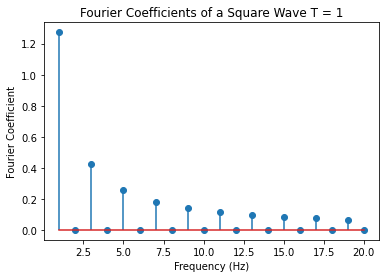

In [20]:
frequencies = np.arange(1,21)
coefficients = 4/np.pi/frequencies*(frequencies%2)
# Put your code here

plt.stem(frequencies, coefficients)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Coefficient')
plt.title('Fourier Coefficients of a Square Wave T = 1')